In [ ]:
from google.colab import drive
 
drive.mount('/content/drive')
 
!ls "/content/drive/My Drive"

Mounted at /content/drive
 all_actions.xlsx
 Animals
 AnimalsNew.rar
 Classroom
'Colab Notebooks'
 cotations-AB.xlsx
 covid19_tweets.csv
 css_sheet.css
'CV_Hichem_Debyaoui_FR (1).pdf'
'CV_Hichem_Debyaoui_FR (2).pdf'
'CV_Hichem_Debyaoui_FR (3).pdf'
 CV_Hichem_Debyaoui_FR.pdf
'DataSample199 (1).xls'
 DataSample199.xls
 Dataset_spine.csv
 data.xlsx
 diabetes.csv
 Dossier
 ex7.py.gdoc
 exp.gsheet
'file - Copie.gdoc'
 final.xlsx
'HCIP-AI-EI Developer V2.0 Exam Outline.pdf'
'HCIP-AI-EI Developer V2.0 Mock Exam.docx'
 house-prices.csv
 index.html
 iris.csv
 kids.css
'Lettre de motivation – Stage PFE – Hichem Debyaoui.pdf'
 my_new_Data.xls
 New.csv
 New_Data.xls
 new_test.csv
 Nou.csv
 preview
'scores (1).gdoc'
 scores.gdoc
 spam.csv
 tekup_data.csv
 Temperature2.csv
 TEPUP2019
 test2.csv
 Test.csv
 test.html
 Train.csv
 V2.0.rar
 yalefaces


In [ ]:
import os 
os.getcwd()
os.chdir('/content/drive/My Drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Temperature2.csv' , index_col='Date', parse_dates=['Date'])
df.head()

,Temperature
Date,
2013-01-01,13.0
2013-01-02,20.0
2013-01-03,15.0
2013-01-04,15.0
2013-01-05,19.0


In [ ]:
df.shape

(2190, 1)

In [ ]:
df.describe()

,Temperature
count,2190.000000
mean,24.910046
std,5.953617
min,7.800000
25%,20.000000
50%,25.000000
75%,30.000000
max,36.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2190 entries, 2013-01-01 to 2018-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2190 non-null   float64
dtypes: float64(1)
memory usage: 34.2 KB


In [ ]:
df.isnull().sum()

Temperature    0
dtype: int64

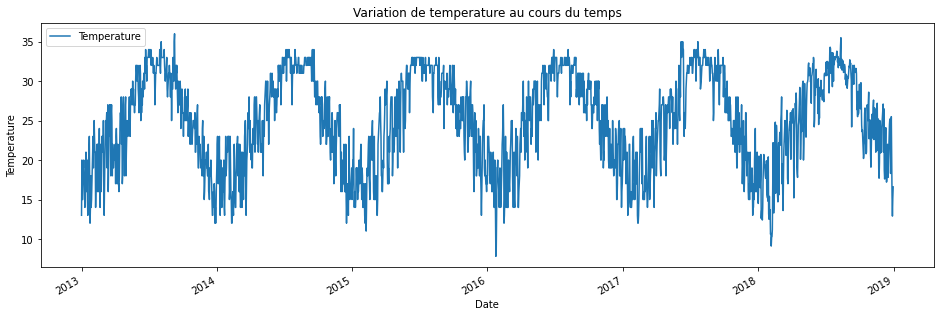

In [ ]:

df[['Temperature']].plot(figsize=(16,5))
plt.title("Variation de temperature au cours du temps")
plt.ylabel("Temperature")
plt.show()

In [ ]:
train_data = df[:'2016'].copy()
test_data = df['2017':].copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)


In [ ]:
X_train = []
y_train = []

for i in range(7,len(train_data)):
    X_train.append(train_data[i-7:i])
    y_train.append(train_data[i,0])

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape  

((1454, 7, 1), (1454,))

In [ ]:
from keras import Sequential
from keras.layers import Dense, LSTM,Dropout

model = Sequential()

model.add(LSTM(units=64, activation='relu', return_sequences=True,
              input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.3))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.3))  
model.add(LSTM(units=50, activation='relu'))
model.add(Dropout(0.3))    
model.add(Dense(units=1))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 64)             16896     
_________________________________________________________________
dropout (Dropout)            (None, 7, 64)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 50)             23000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape'])
history = model.fit(X_train,y_train, epochs=10,batch_size=32)


Epoch 1/10
46/46 [==============================] - 4s 13ms/step - loss: 0.2724 - mse: 0.2724 - mae: 0.4573 - mape: 73014.3149
Epoch 2/10
46/46 [==============================] - 1s 14ms/step - loss: 0.0292 - mse: 0.0292 - mae: 0.1389 - mape: 14956.4808
Epoch 3/10
46/46 [==============================] - 1s 13ms/step - loss: 0.0242 - mse: 0.0242 - mae: 0.1236 - mape: 84043.2932
Epoch 4/10
46/46 [==============================] - 1s 13ms/step - loss: 0.0242 - mse: 0.0242 - mae: 0.1254 - mape: 410346.0195
Epoch 5/10
46/46 [==============================] - 1s 13ms/step - loss: 0.0236 - mse: 0.0236 - mae: 0.1246 - mape: 715984.1633
Epoch 6/10
46/46 [==============================] - 1s 13ms/step - loss: 0.0223 - mse: 0.0223 - mae: 0.1194 - mape: 521539.6970
Epoch 7/10
46/46 [==============================] - 1s 13ms/step - loss: 0.0221 - mse: 0.0221 - mae: 0.1186 - mape: 19049.5098
Epoch 8/10
46/46 [==============================] - 1s 14ms/step - loss: 0.0220 - mse: 0.0220 - mae: 0.1221 

In [ ]:
X_test = []
y_test = []

for i in range(7, test_data.shape[0]):
    X_test.append(test_data[i-7:i])
    y_test.append(test_data[i,0])

X_test,y_test = np.array(X_test), np.array(y_test)
X_test.shape,y_test.shape

((722, 7, 1), (722,))

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import explained_variance_score
ev = explained_variance_score(y_test,y_pred)
ev


0.6913360207904268

In [ ]:
scaler.scale_[0]
scale = 1/scaler.scale_[0]
y_pred = y_pred * scale
y_test = y_test* scale

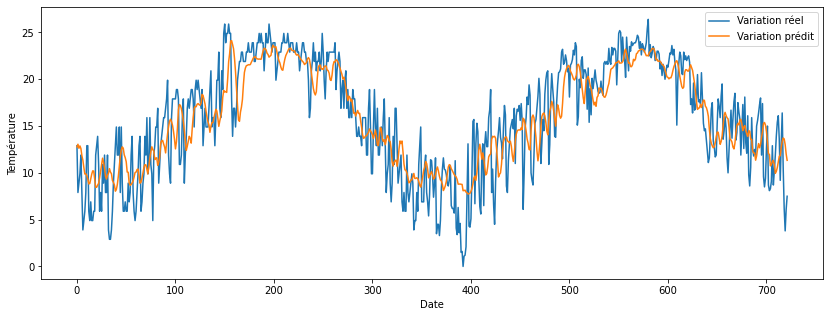

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test,label='Variation réel')
plt.plot(y_pred,label='Variation prédit')
plt.xlabel('Date')
plt.ylabel("Température")
plt.legend()
plt.show()

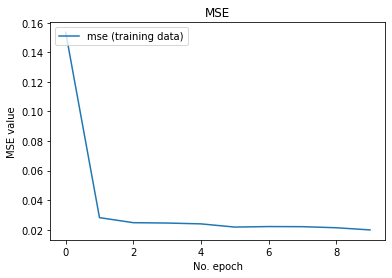

In [ ]:
plt.plot(history.history['loss'], label='mse (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()
